In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#test_path = r"C:\Users\lambda\Desktop\martha\Scan - Lambda 950 - CDOM Bennet_Martha Tuesday, 26 February 2019 09_18 W. Europe Standard Time"
PeCaBeau_p = r"C:\Users\bjuhls\Desktop\CDOM_GFZ\PeCaBeau2021\20211124"

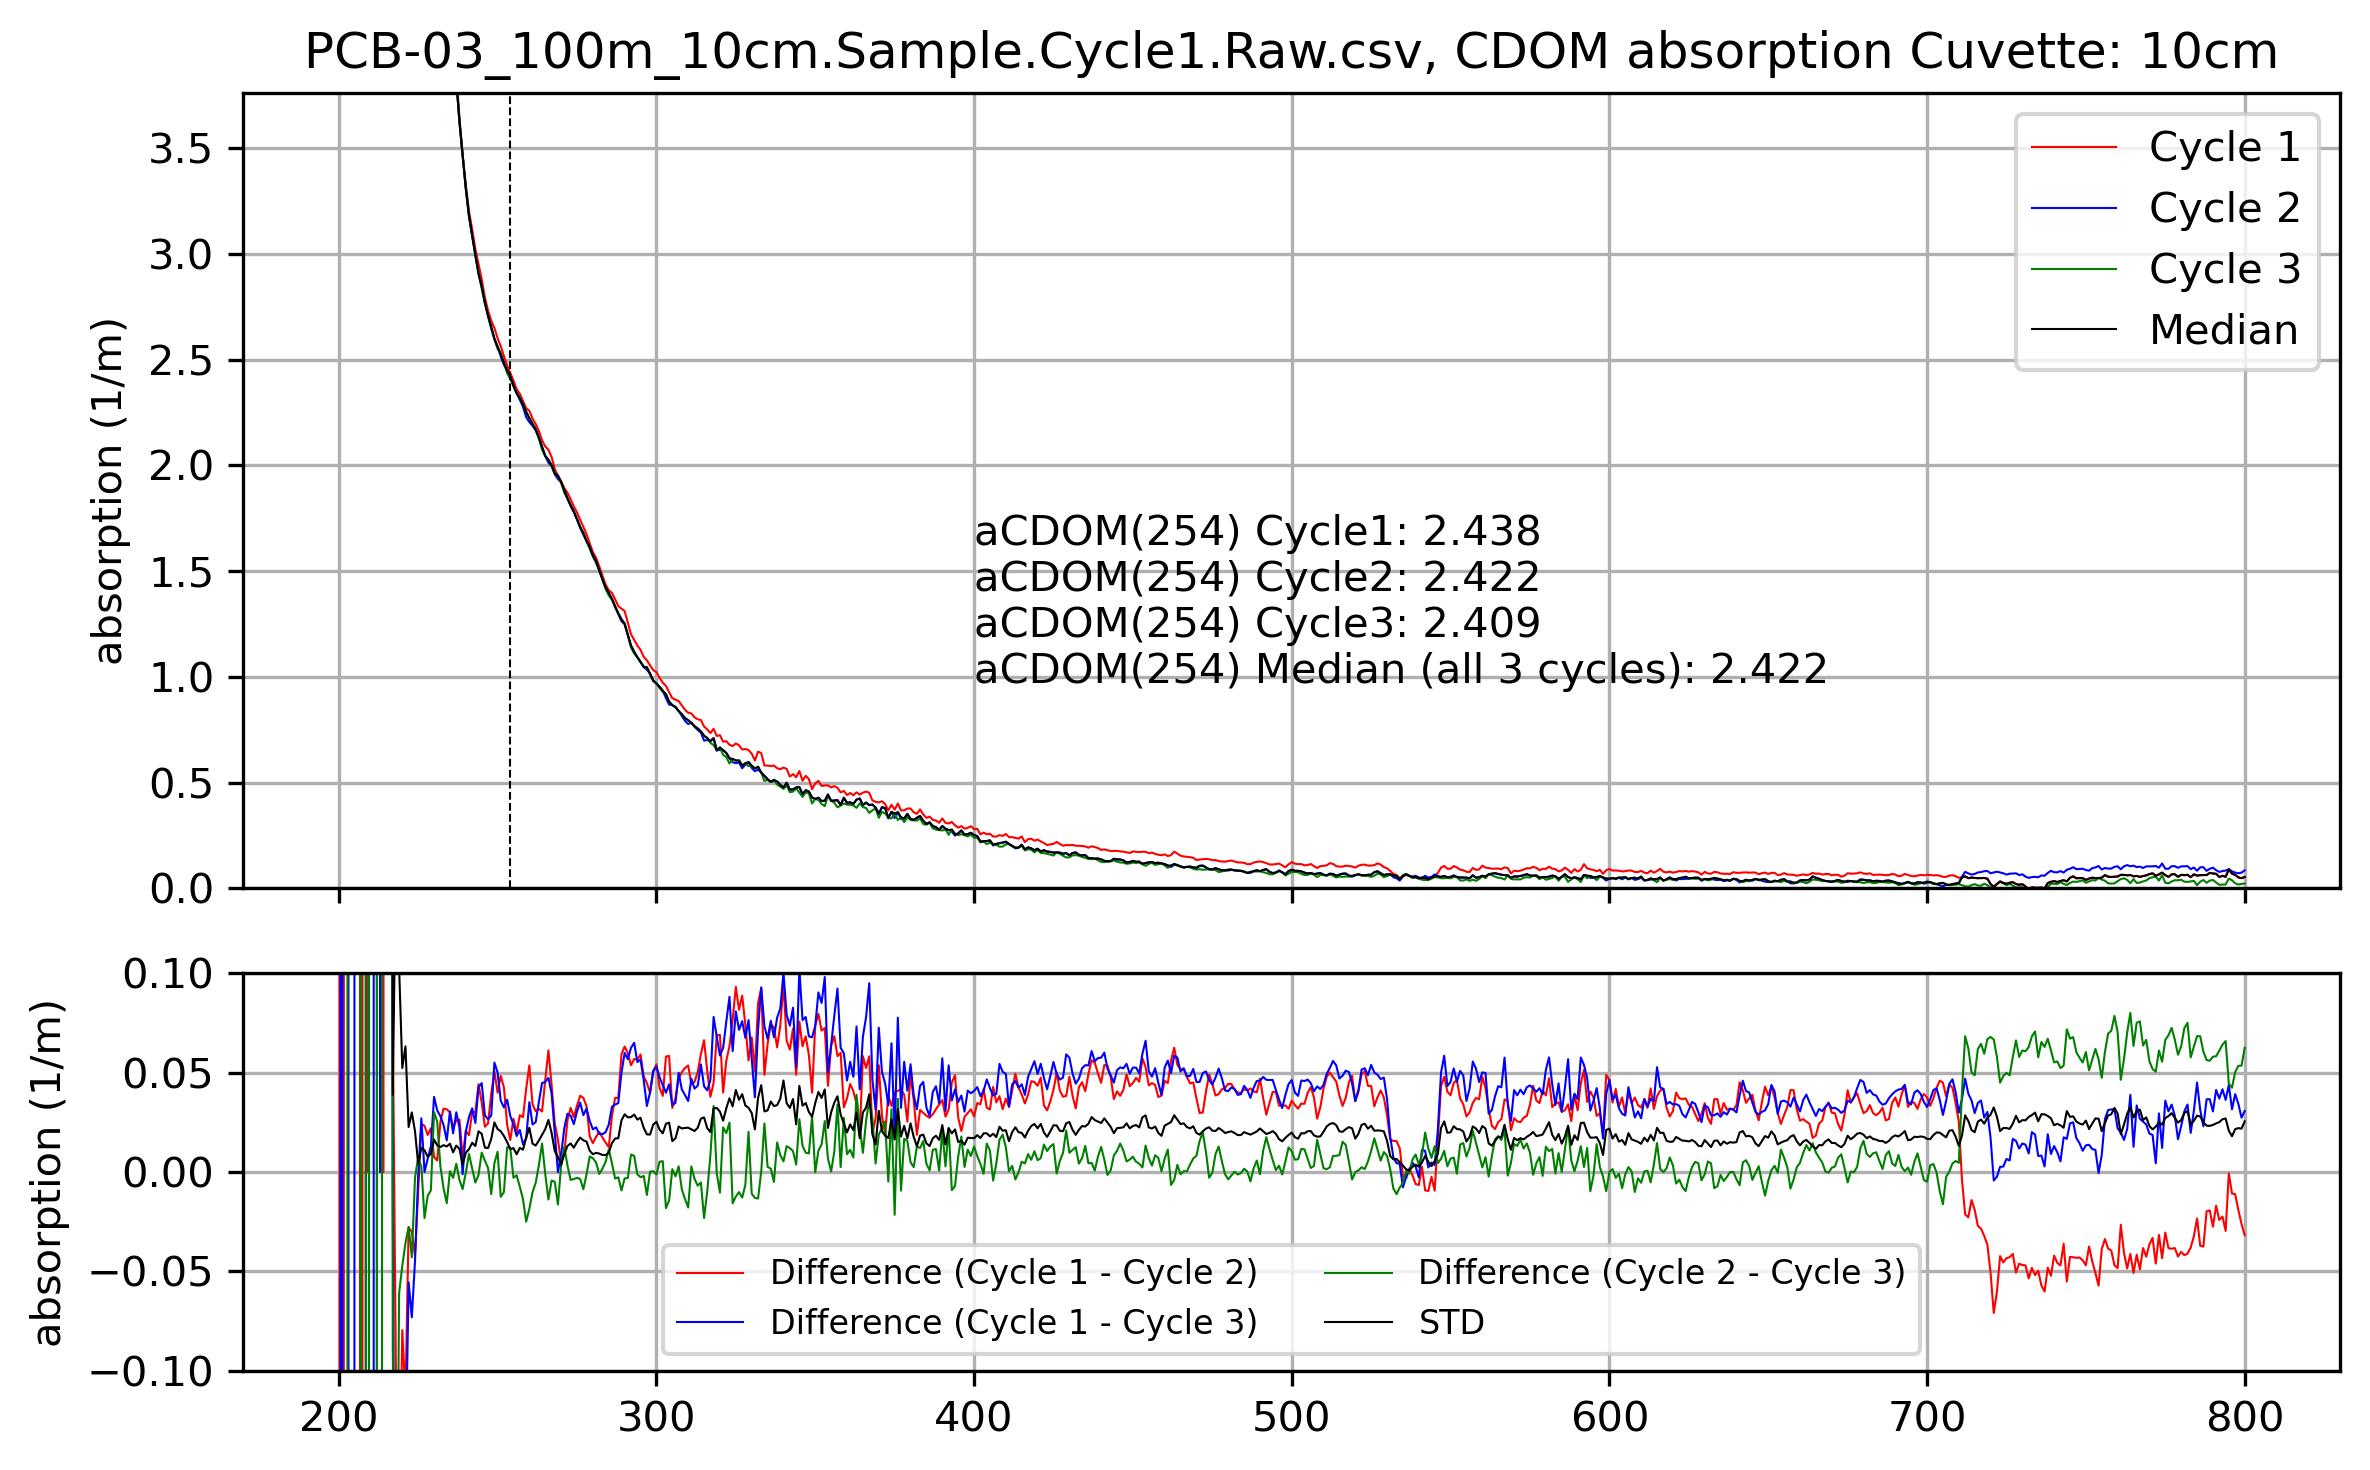

Absorption at 254nm: 
Cycle1: 2.4376333800000003
Cycle2: 2.4215354099999997
Cycle3: 2.4094907199999995
Median (all 3 cycles): 2.4215354099999997


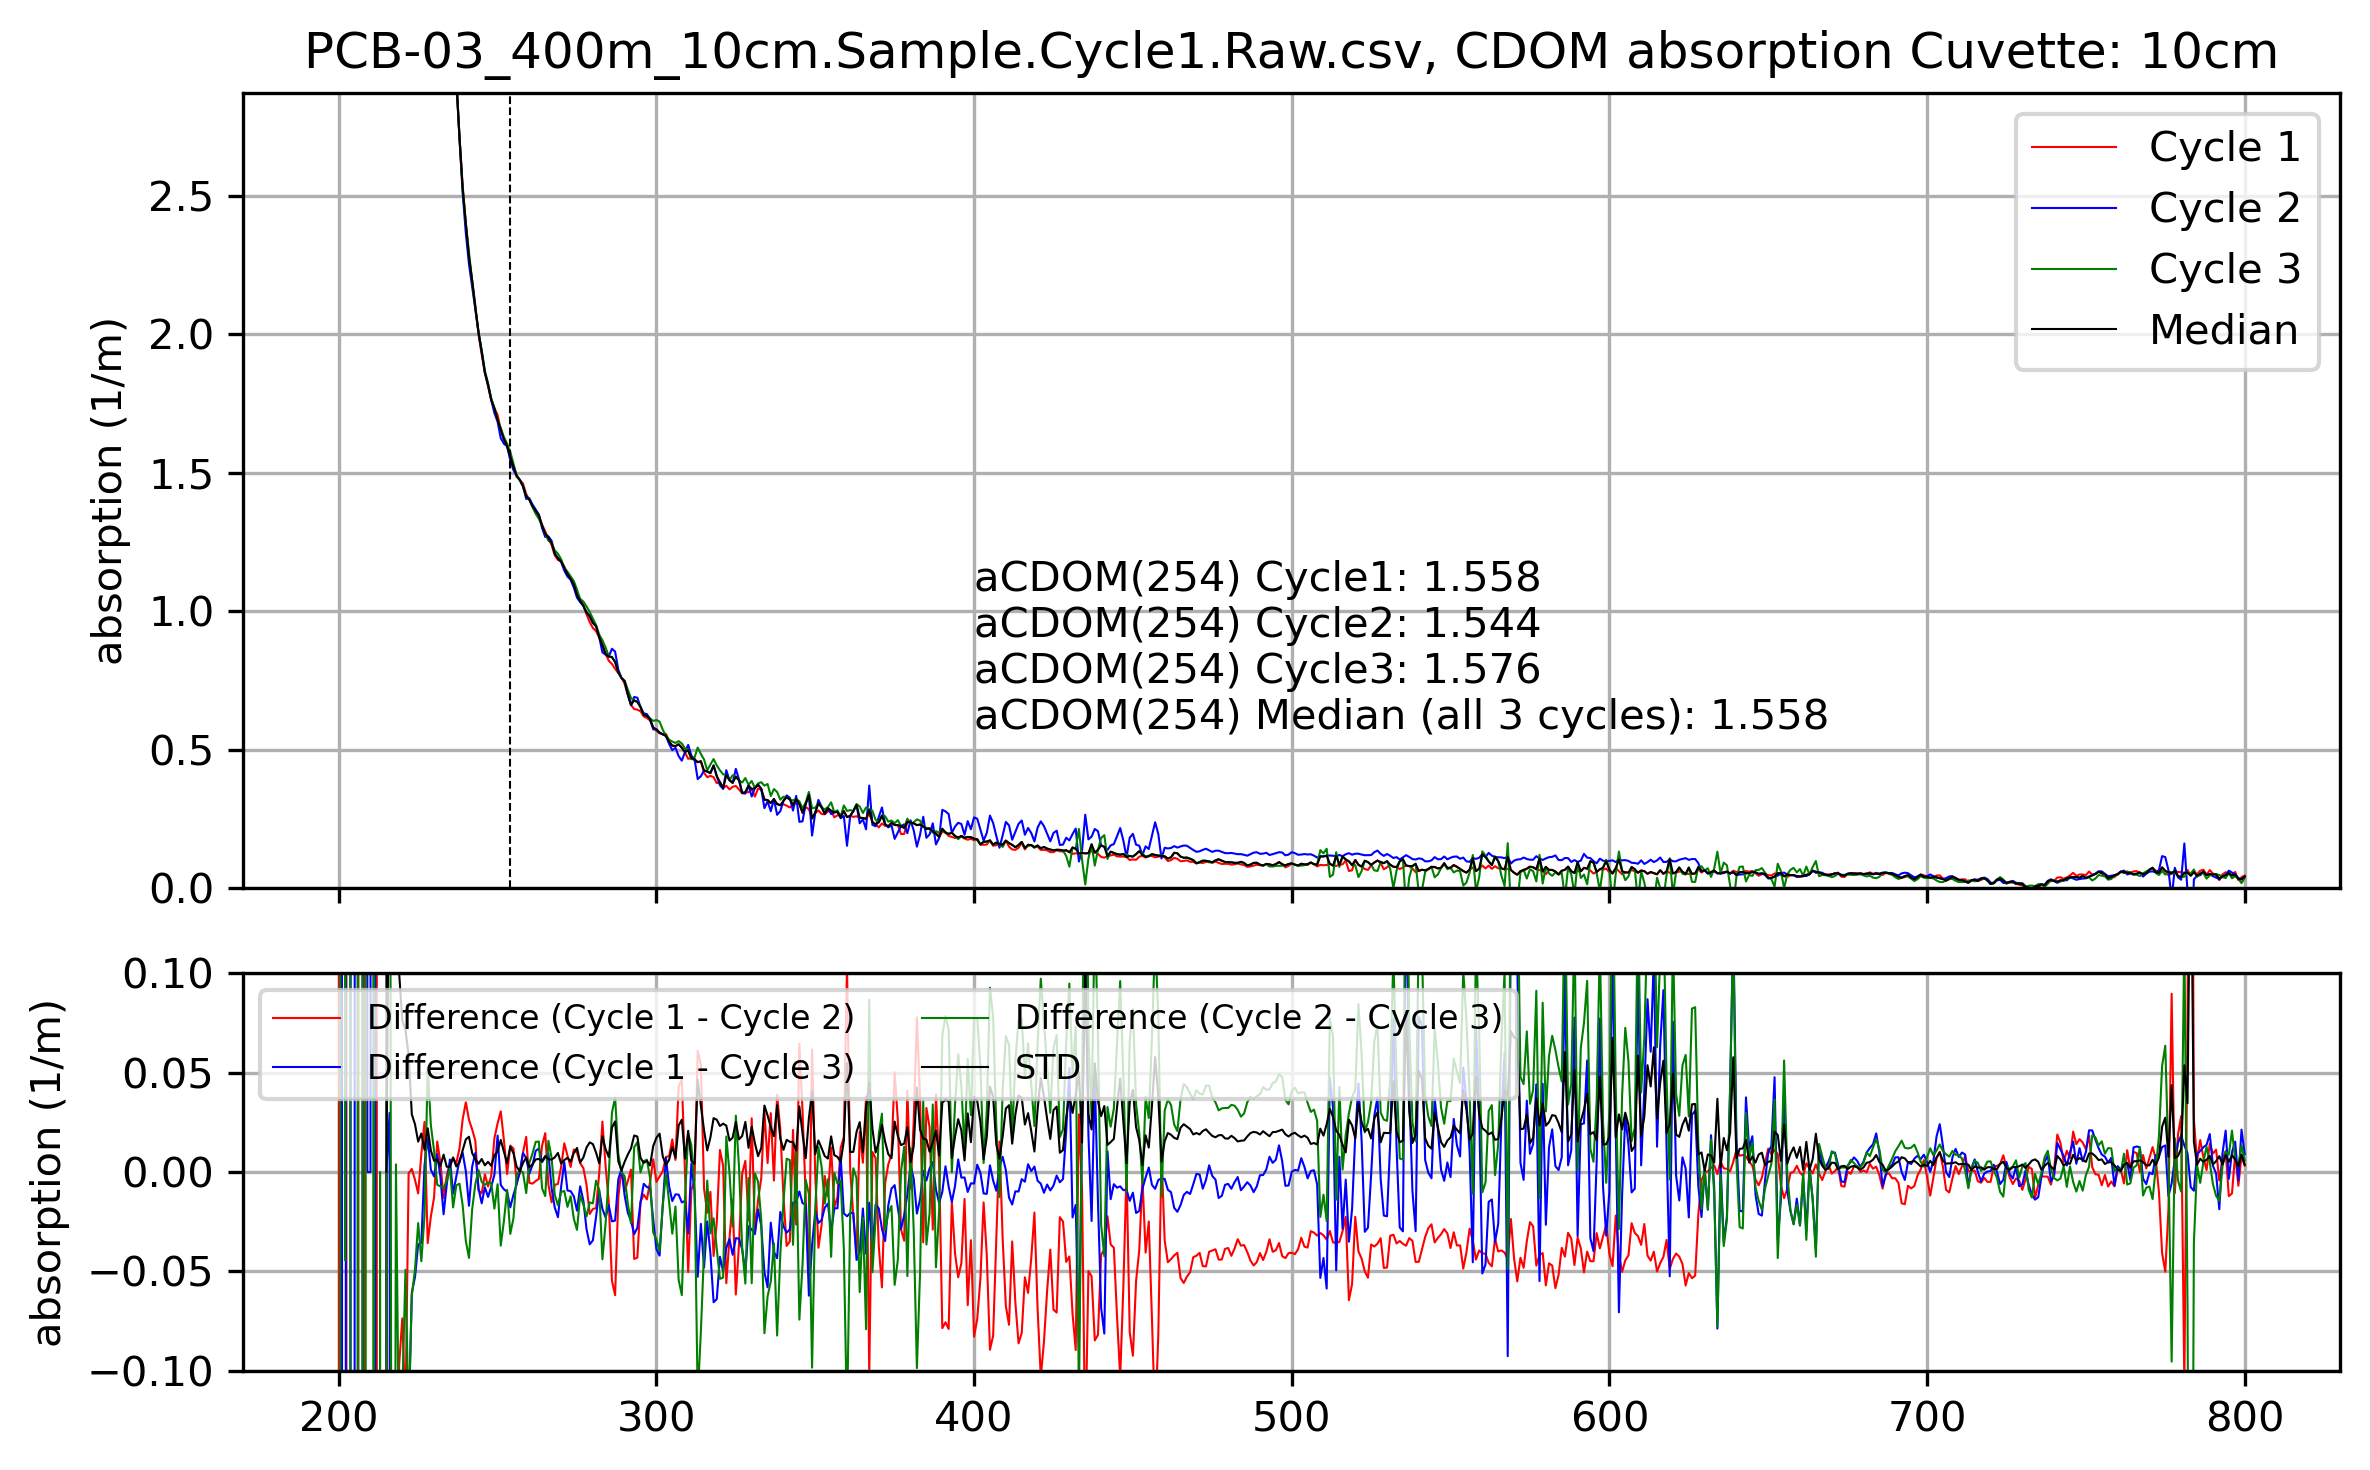

Absorption at 254nm: 
Cycle1: 1.5577722299999999
Cycle2: 1.54443786
Cycle3: 1.57555139
Median (all 3 cycles): 1.5577722299999999


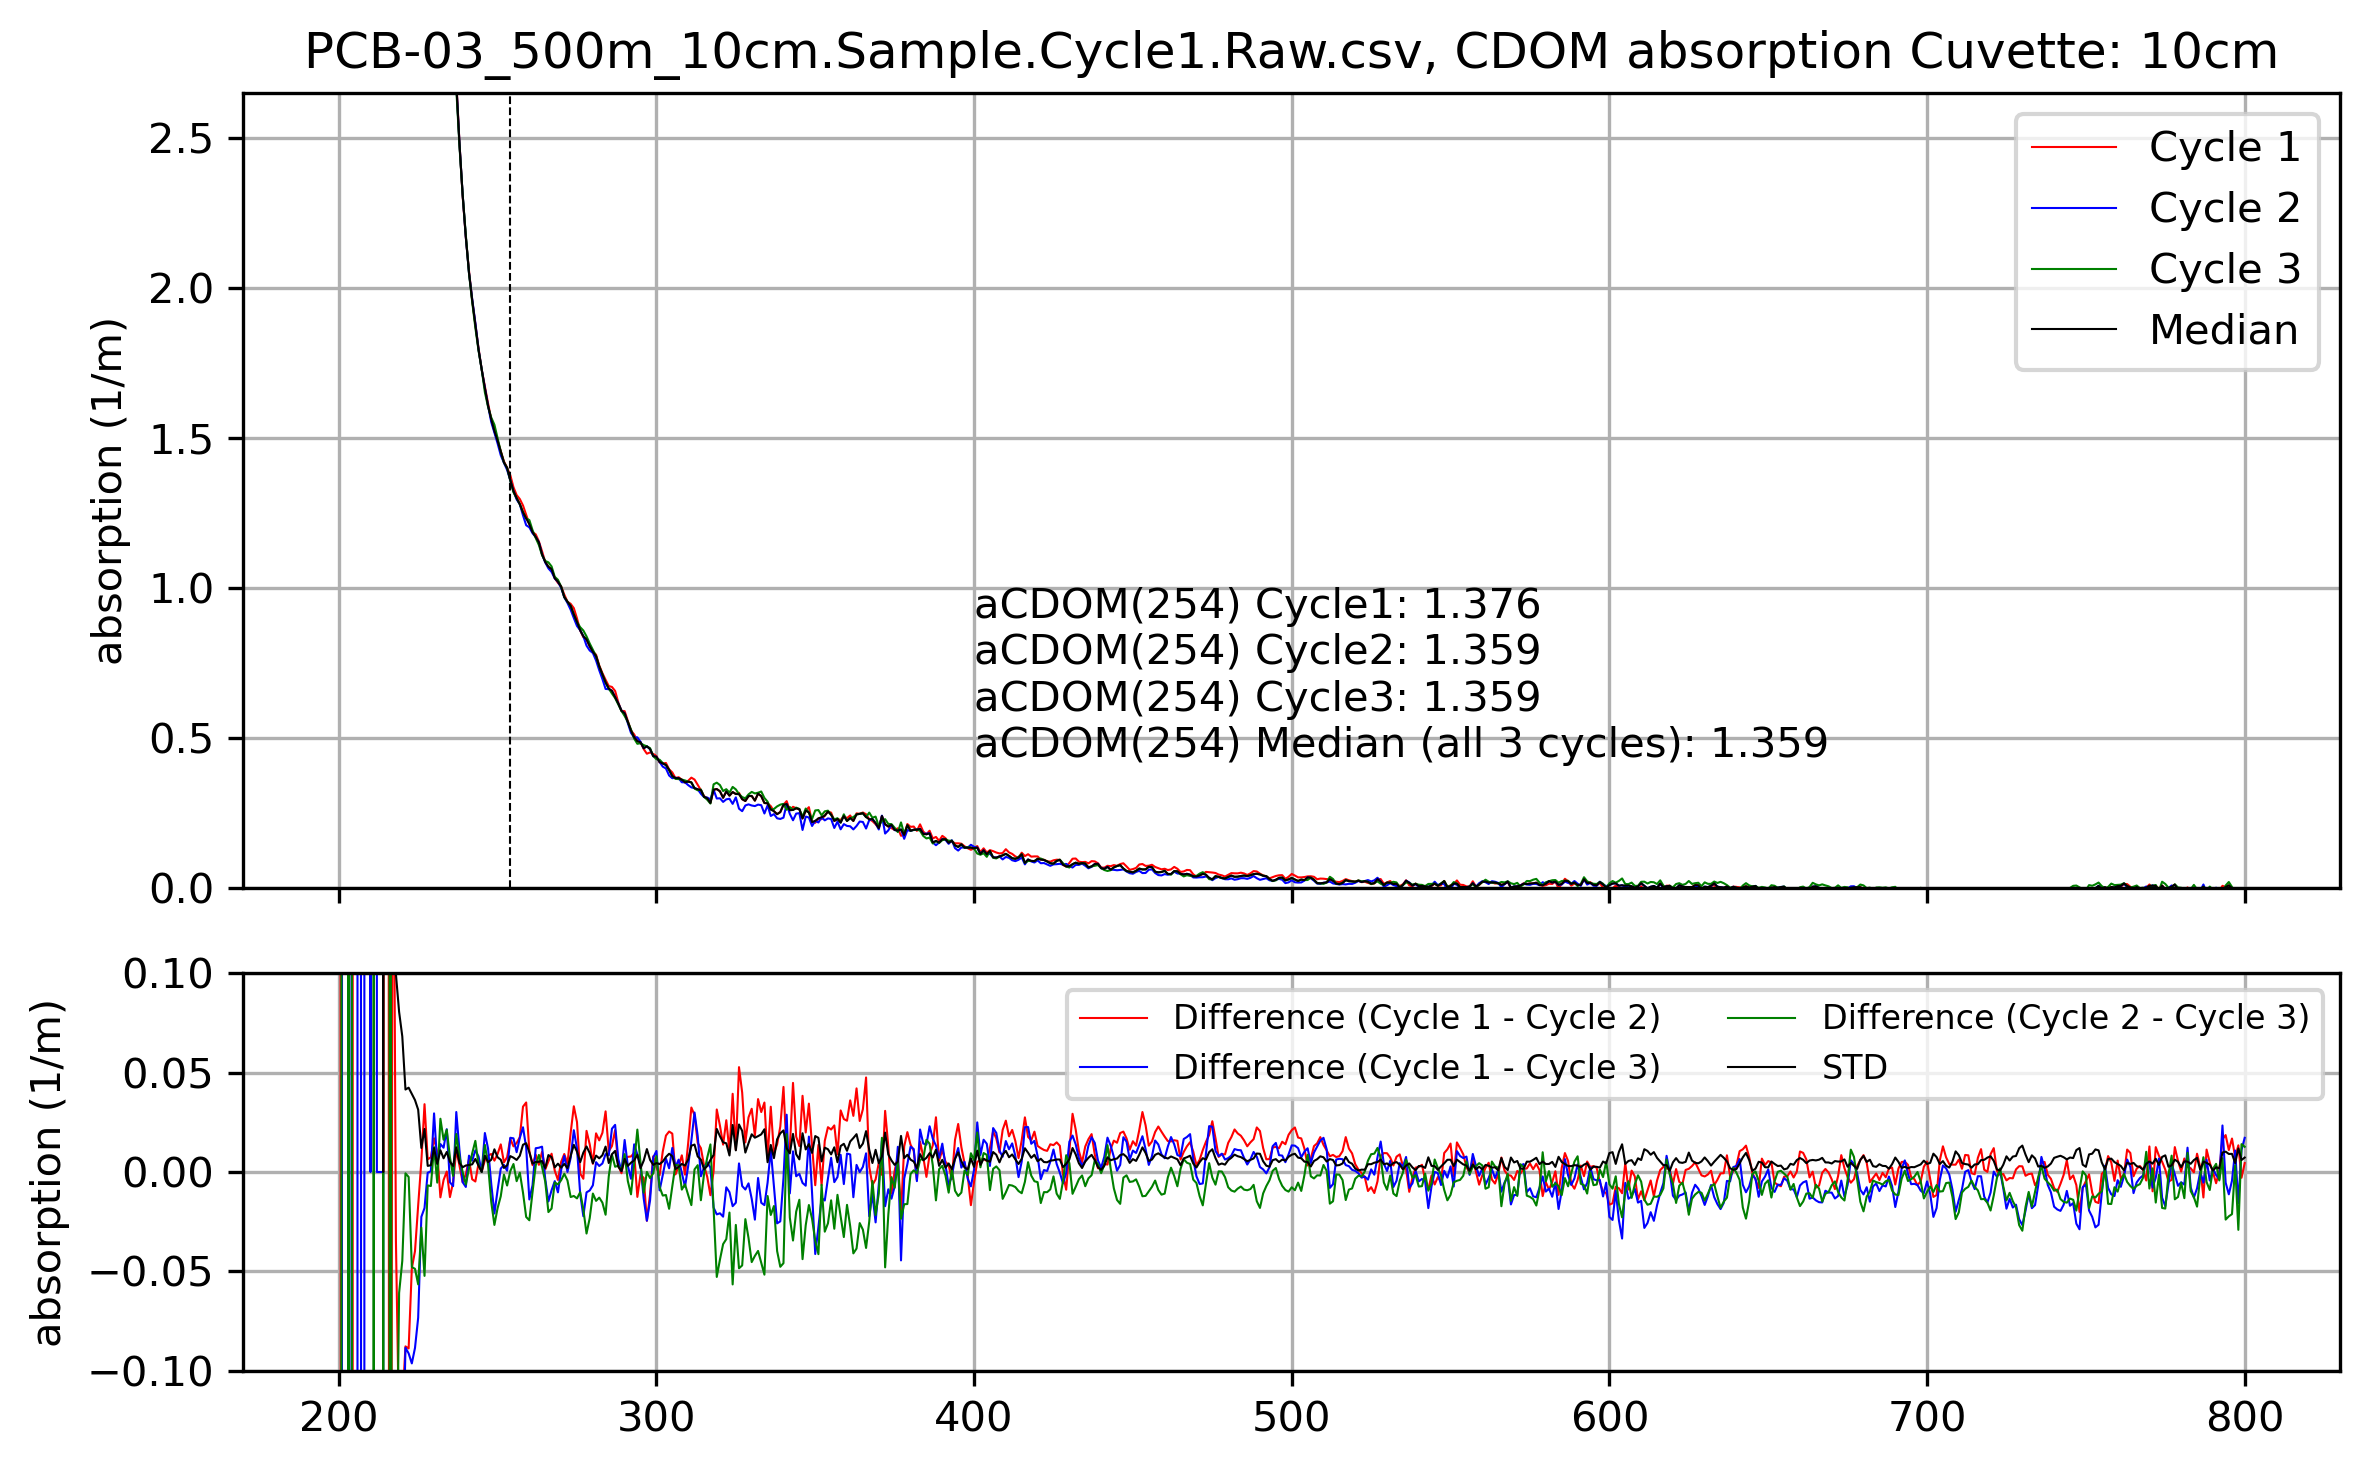

Absorption at 254nm: 
Cycle1: 1.3761806799999998
Cycle2: 1.35941484
Cycle3: 1.35895424
Median (all 3 cycles): 1.35941484


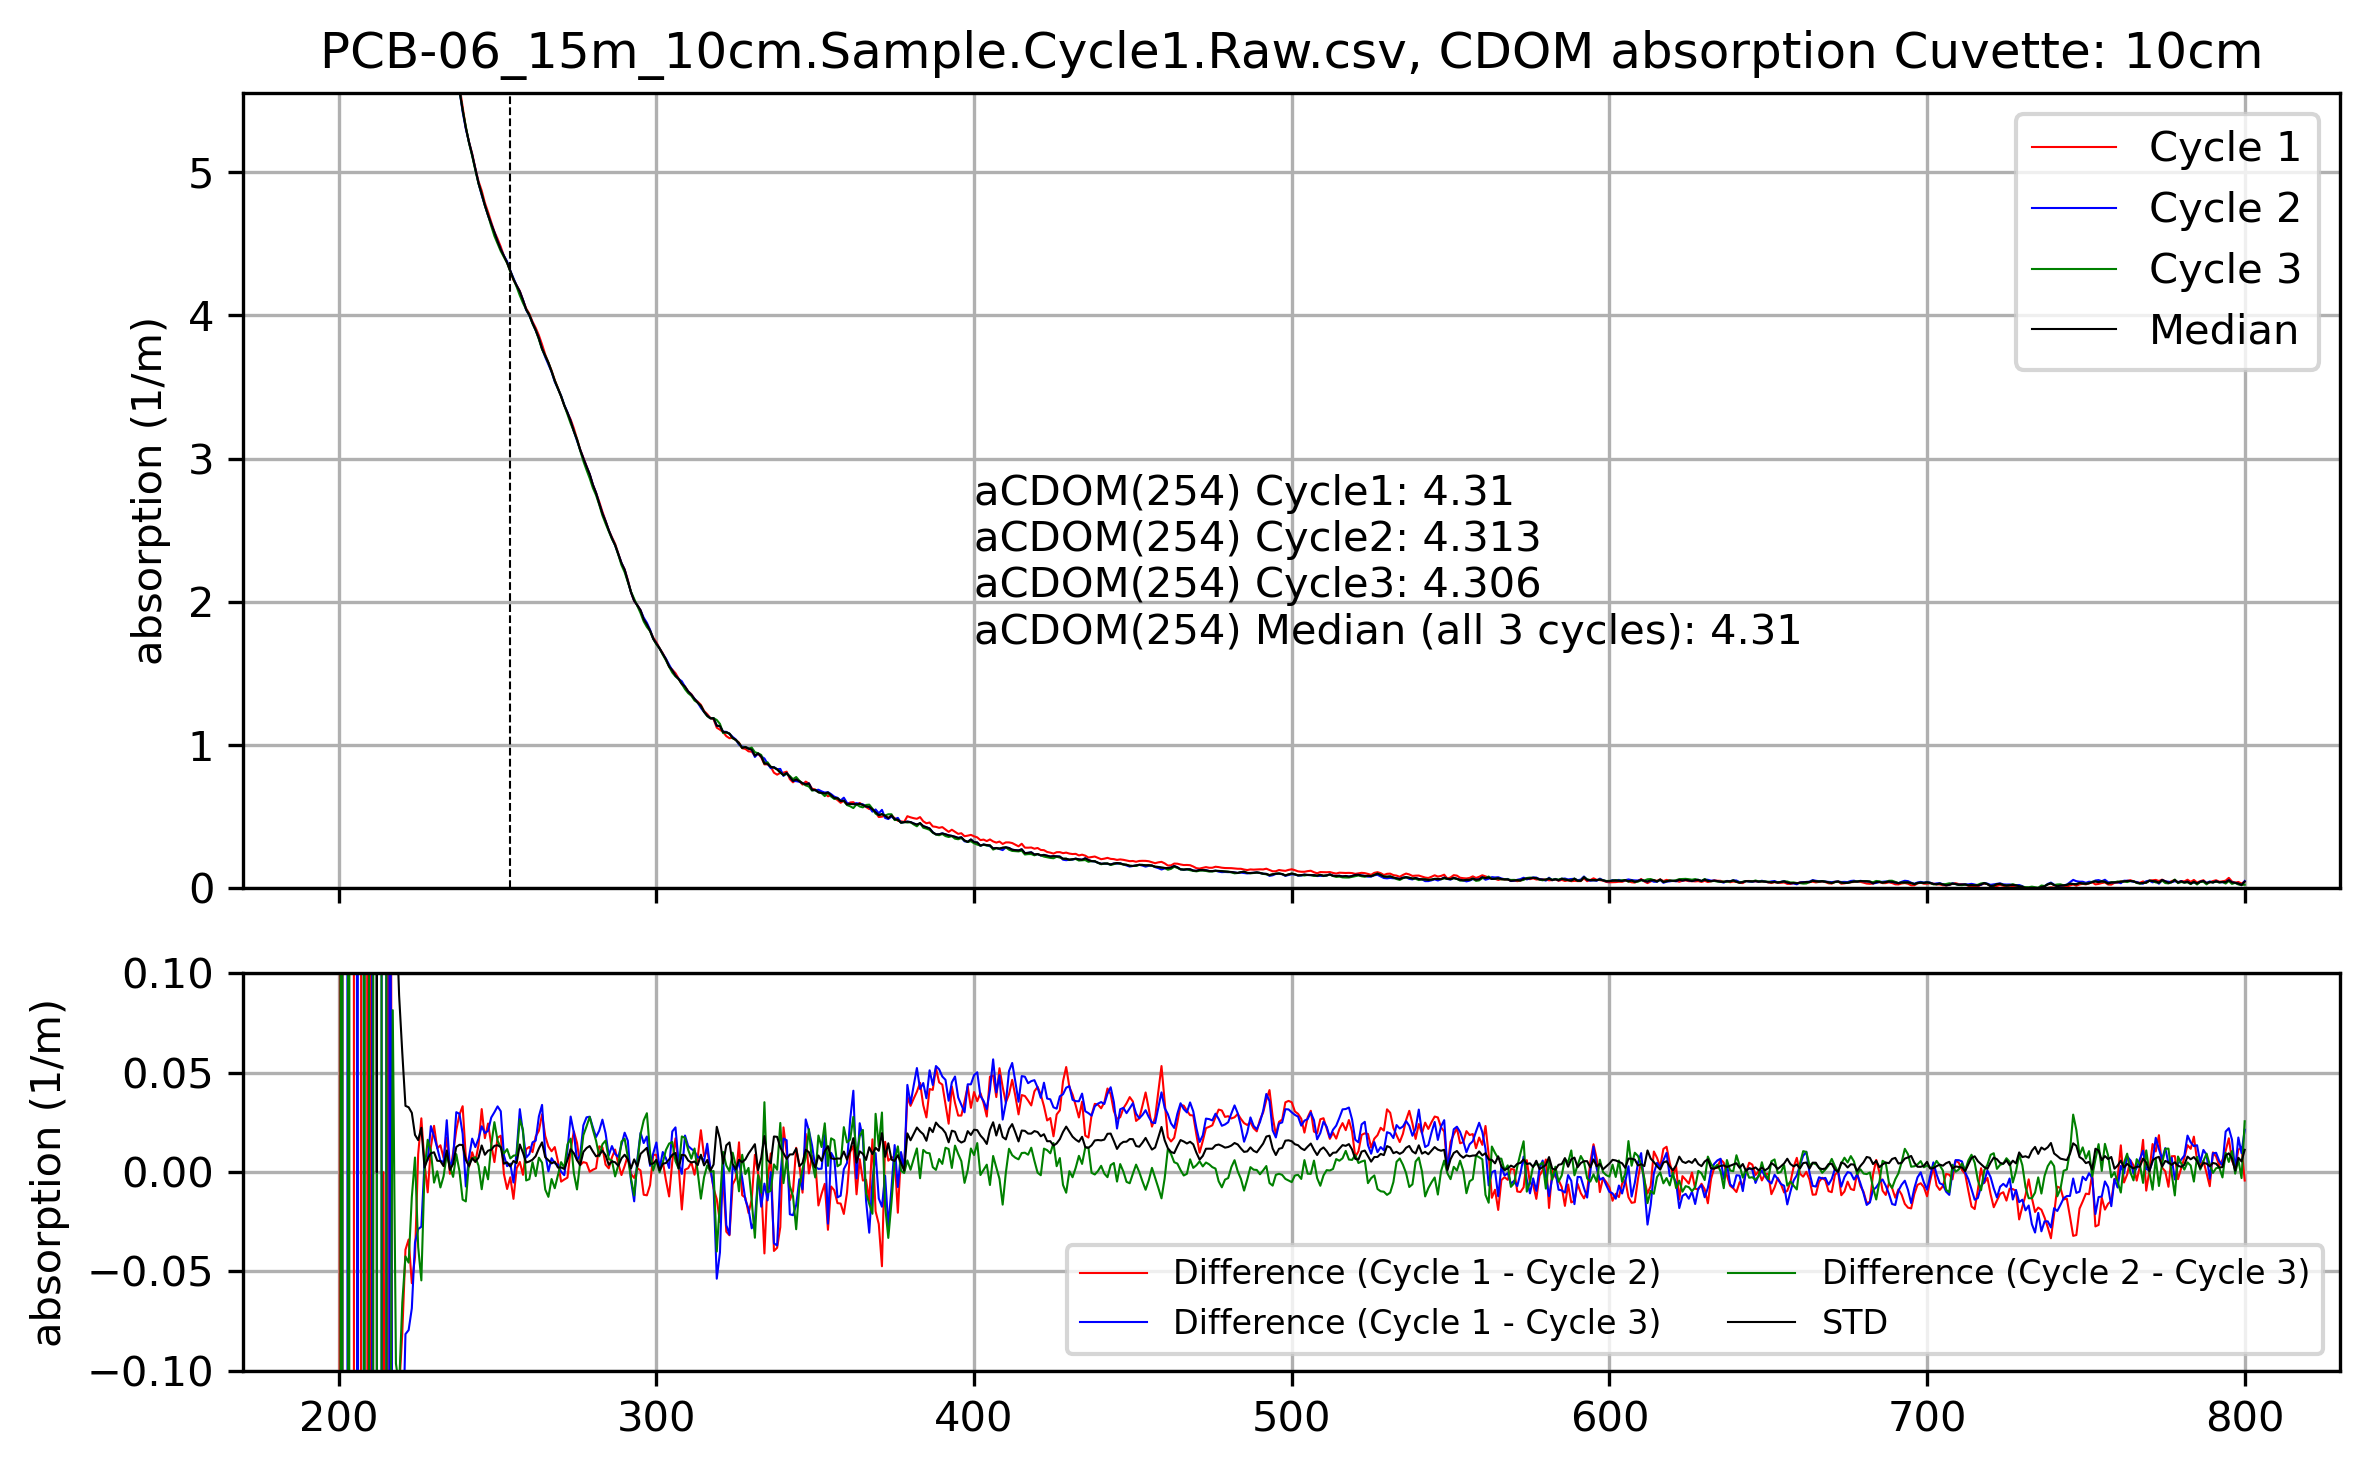

Absorption at 254nm: 
Cycle1: 4.310432979999999
Cycle2: 4.3130814299999995
Cycle3: 4.306241519999999
Median (all 3 cycles): 4.310432979999999


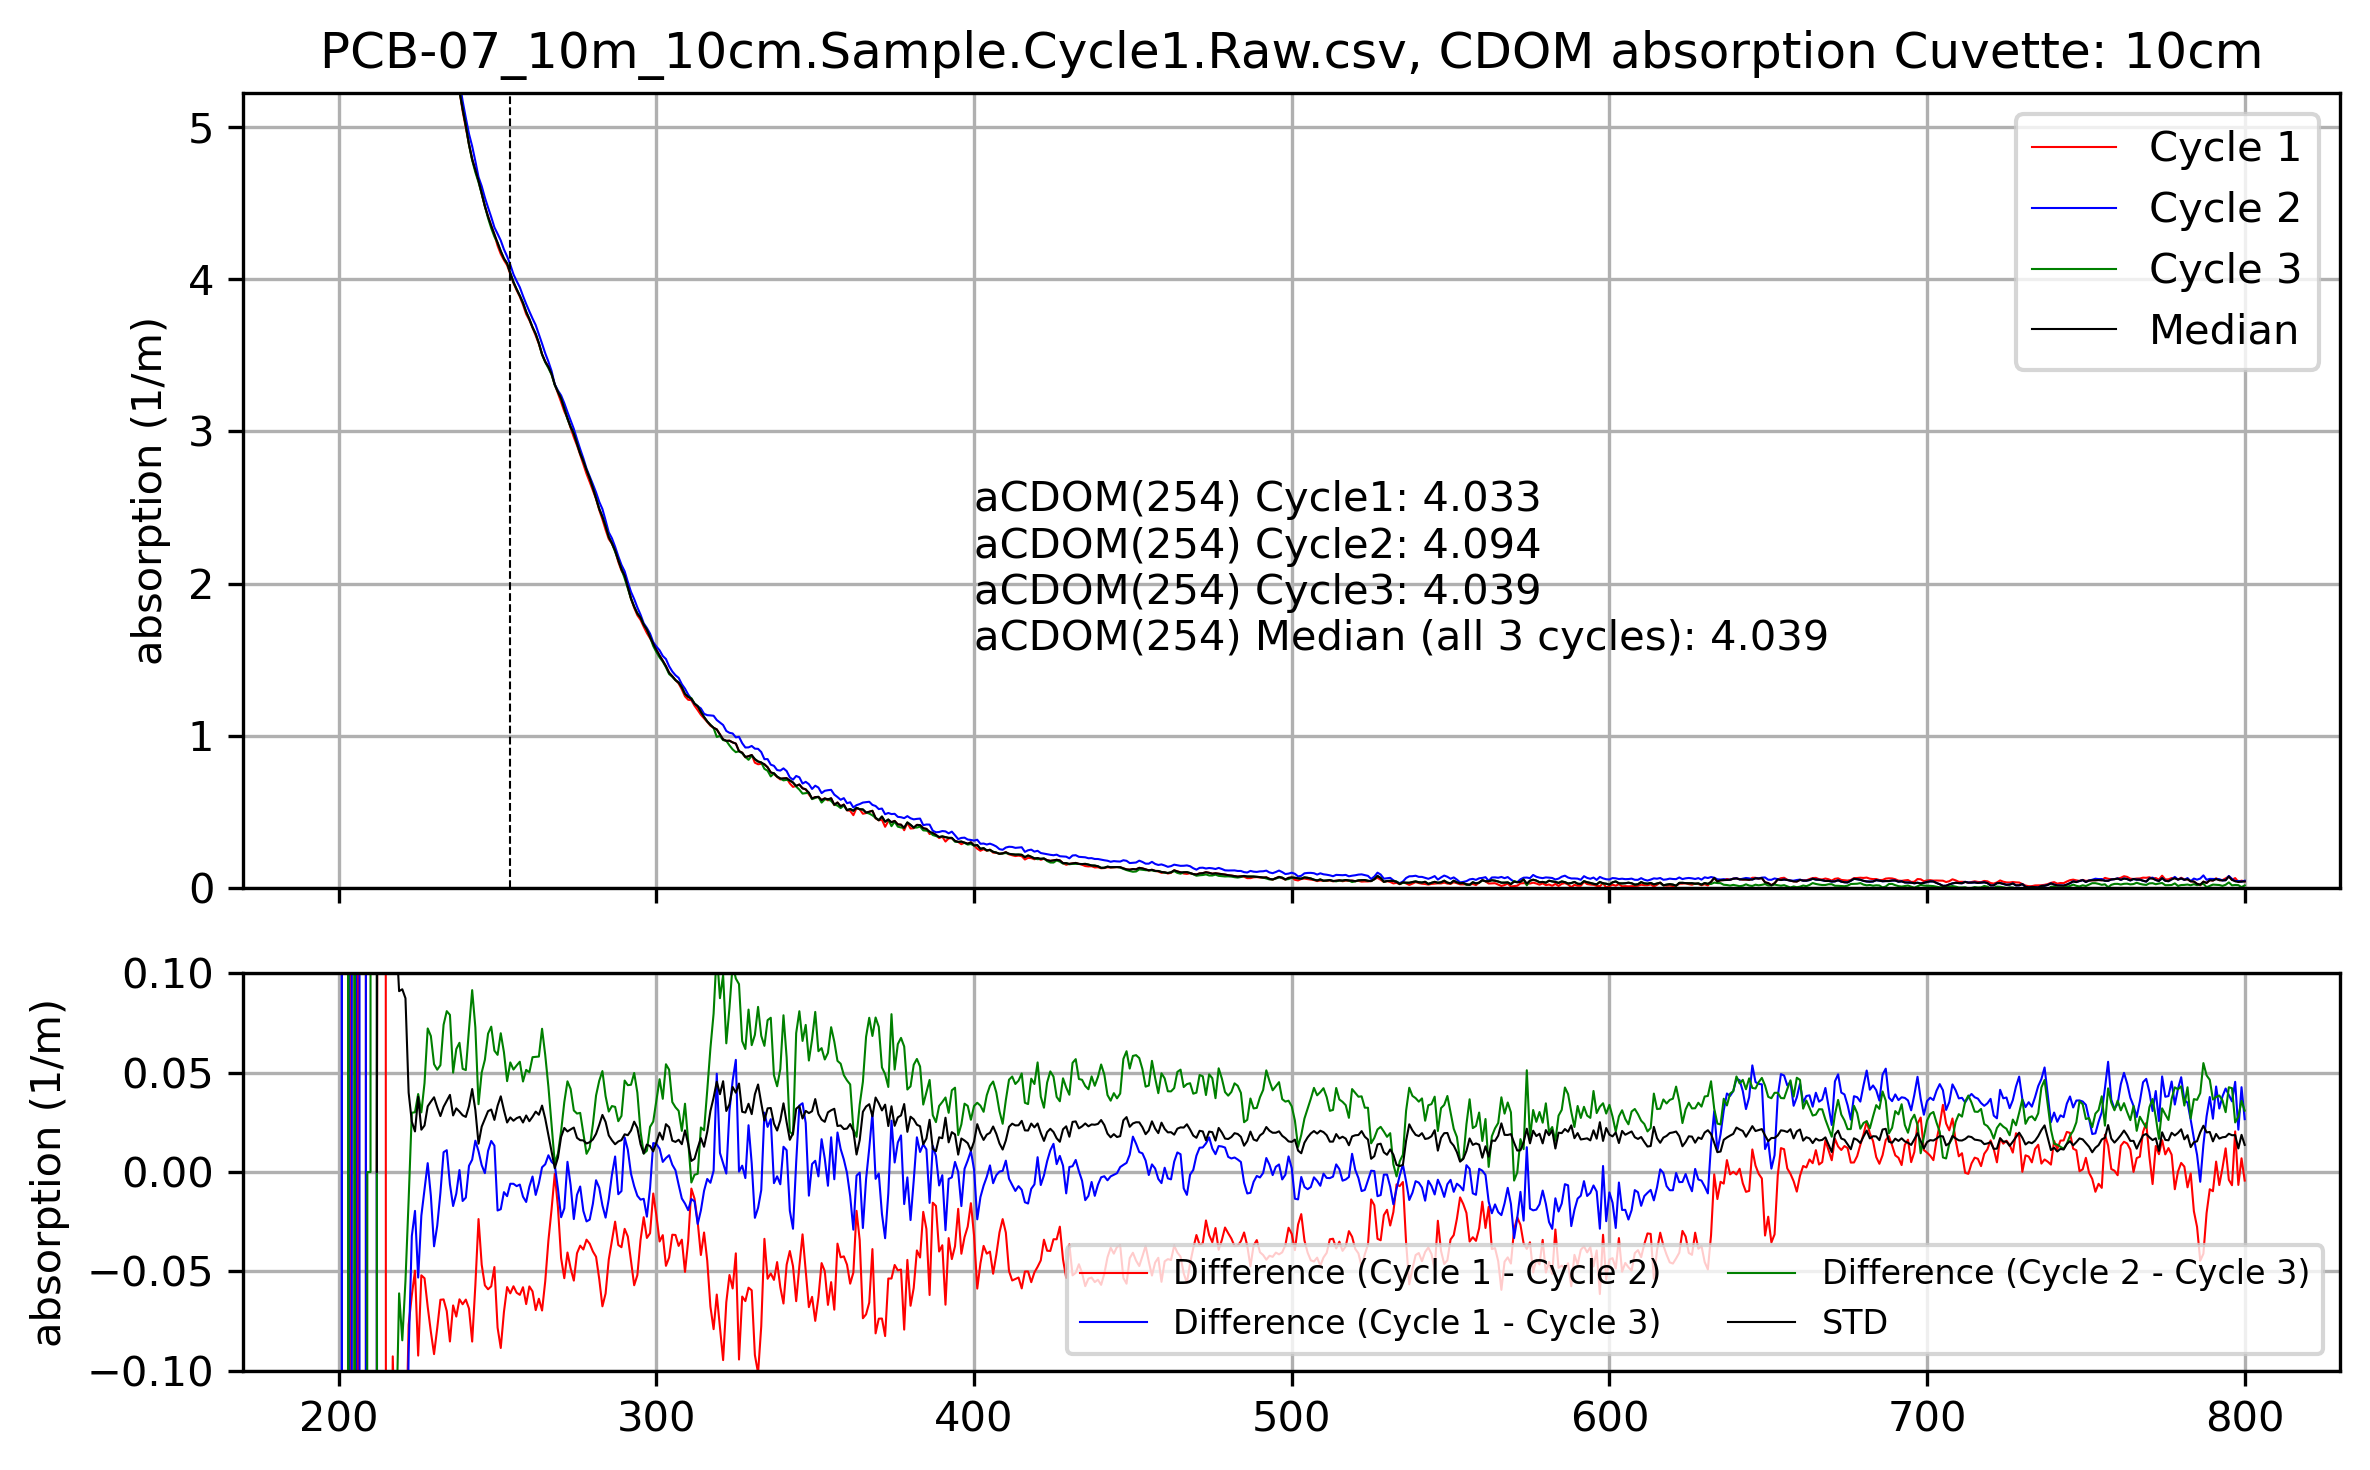

Absorption at 254nm: 
Cycle1: 4.03303663
Cycle2: 4.09406613
Cycle3: 4.03893231
Median (all 3 cycles): 4.03893231


In [20]:

for i, e in enumerate(sorted(os.listdir(PeCaBeau_p))[:]):
    if e.endswith("Raw.csv"):
        #print(e)
        if "Blank" in e:
            pass
        elif "Sample" in e:
            if "Cycle1" in e:
                #print(e[-9:-8])
                #print(e[-25:-24])
                pos = e.find('cm')
                C_lenght = e[pos-2:pos]

                Data_cycle1 = pd.read_csv(PeCaBeau_p + "\\" + e, sep=";")
                Data_cycle2 = pd.read_csv(PeCaBeau_p + "\\" +e[:-9] + "2" + e[-8:], sep=";" )
                Data_cycle3 = pd.read_csv(PeCaBeau_p + "\\" +e[:-9] + "3" + e[-8:], sep=";" )

                wvl = Data_cycle1["nm"]
                A_cyc1 = Data_cycle1[" A"]
                A_cyc2 = Data_cycle2[" A"]
                A_cyc3 = Data_cycle3[" A"]

                Abs_1 = Data_cycle1[" A"]* 2.303 / (float(C_lenght)/100)
                Abs_2 = Data_cycle2[" A"]* 2.303 / (float(C_lenght)/100)
                Abs_3 = Data_cycle3[" A"]* 2.303 / (float(C_lenght)/100)
                
                #print(A_cyc3)

                Median_A = np.nanmedian([A_cyc1, A_cyc2, A_cyc3], axis=0)
                Median_abs = Median_A * 2.303 / (float(C_lenght)/100)

                Diff1_2 = Abs_1 - Abs_2
                Diff1_3 = Abs_1 - Abs_3
                Diff2_3 = Abs_2 - Abs_3
                Std = np.nanstd([Abs_1,Abs_2, Abs_3], axis=0 )

                ymax = np.nanmean(Median_abs[-50:-30])

                f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(8,5), dpi=300, sharex=True, gridspec_kw={'height_ratios': [3, 1.5]} )

                ax1.plot(wvl, Abs_1, "r-", label = "Cycle 1", lw=0.5)
                ax1.plot(wvl, Abs_2, "b-", label = "Cycle 2", lw=0.5)
                ax1.plot(wvl, Abs_3, "g-", label = "Cycle 3", lw=0.5)
                ax1.plot(wvl, Median_abs, "k-", label="Median", lw=0.5)
                ax1.set_ylabel("absorption (1/m)")
                ax1.set_ylim(0, ymax)
                ax1.axvline(254, lw=0.5, linestyle="--", c="k")
                #axvline(x=0, ymin=0, ymax=1,

                ax2.plot(wvl, Diff1_2, "r-", label = "Difference (Cycle 1 - Cycle 2)", lw=0.5)
                ax2.plot(wvl, Diff1_3, "b-", label = "Difference (Cycle 1 - Cycle 3)", lw=0.5)
                ax2.plot(wvl, Diff2_3, "g-", label = "Difference (Cycle 2 - Cycle 3)", lw=0.5)
                ax2.plot(wvl, Std, "k-", label = "STD", lw=0.5)
                #Std
                ax2.set_ylim(-.1,0.1)
                ax2.set_ylabel("absorption (1/m)")

                ax1.set_title(e + ", CDOM absorption Cuvette: " + C_lenght + "cm")

                
                ax1.text(400, Median_abs[500], 
                            "aCDOM(254) Cycle1: " + str(round(Abs_1[546],3))
                            + "\n" + "aCDOM(254) Cycle2: " + str(round(Abs_2[546],3))  
                            + "\n" + "aCDOM(254) Cycle3: " + str(round(Abs_3[546],3)) 
                            + "\n" + "aCDOM(254) Median (all 3 cycles): " +  str(round(Median_abs[546],3)) 
                            )
                ax1.legend()
                ax2.legend(fontsize=8, ncol=2)
                ax1.grid()
                ax2.grid()
                plt.tight_layout()

                plt.show()
                print("Absorption at 254nm: ")
                #357 = 443
                #546 = 254

                print("Cycle1: " + str(Abs_1[546]))
                print("Cycle2: " + str(Abs_2[546]))
                print("Cycle3: " + str(Abs_3[546]))
                print("Median (all 3 cycles): " + str(Median_abs[546]))